<a href="https://colab.research.google.com/github/youngjin1106/Sales_prediction/blob/main/Sales_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [53]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
#Load Data
path = '/content/sales_predictions.csv'
df = pd.read_csv(path)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
#Make a copy 
df_ml=df.copy()

In [56]:
#.head() of copy
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
#Explore Data for cleaning before Machine Learning
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [58]:
#Identify Duplicates
df_ml.duplicated().sum()

0

In [59]:
#Find Missings
df_ml.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [60]:
#Indetifying Objecst looking for ones that need changed
dtypes = df_ml.dtypes
str_cols = dtypes[dtypes == 'object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [61]:
#Check for inconsistencies
for col in str_cols:
  print(f'-Colummns={col}')
  print(df_ml[col].value_counts(dropna= False))
  print('\n\n')

-Colummns=Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



-Colummns=Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



-Colummns=Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



-Colummns=Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    9

I am going to correct Item_Fat_content to match. The missing value will be dealth with later in the pipeline

In [62]:
#Make Changes
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('LF', 'Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('reg', 'Regular')
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

#Identify Features (X) and target (y)

In [63]:
# Drop Unnecessary columns
df_ml.drop(columns=['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type'])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,Medium,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,High,994.7052
...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,NaN,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,1845.5976


In [64]:
#Define X Feature
X = df_ml.drop(columns ='Item_Outlet_Sales')
#Define Target y
y= df_ml['Item_Outlet_Sales']
#Train/Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

#Preprocessing 

In [44]:
#Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [45]:
#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy= 'mean')
#Scaler
scaler= StandardScaler()
#One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse= False)

In [46]:
#Instantiate Pipeline
#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [47]:
#Categorical Pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [48]:
#Instantiate ColumnTransformer
#Tuples for ColumnTransformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
#ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple,remainder= 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fccfd866610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fccfd866190>)])

In [49]:
#Transform Data
#Fit on train
preprocessor.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fccfd866610>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fccfd866190>)])

In [50]:
#Transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [51]:
#Inspect Results
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
shape of data is (6392, 1592)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

#Regression Models

Linear Regression model

In [65]:
#Import linear model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [66]:
#Create a modeling pipeline
reg_pipe = make_pipeline(preprocessor, reg)

In [67]:
#Train the model on training data
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fccfd866610>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fccfd866190>)])),
                ('linearregression', LinearRegression())])

#Evaluate in r2

In [68]:
#Create model predictions
train_pred = reg_pipe.predict(X_train)
test_pred = reg_pipe.predict(X_test)

In [69]:
#Calculating R2
train_r2 = np.corrcoef(y_train,train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2
print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.6714424977432687
Model Testing R2: 2.0994337117833997e-05


#Evaluate base on rmse

In [70]:
#Calculating RMSE
train_rmse = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_rmse = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))
print(f'Model Training RMSE: {train_rmse}')
print(f'Model Testing RMSE:{test_rmse}')

Model Training RMSE: 986.0858114271118
Model Testing RMSE:6762579228318.999


Decision tree

In [71]:
#Import model library
from sklearn.tree import DecisionTreeRegressor

In [72]:
#Make instance for model
dec_tree = DecisionTreeRegressor(random_state = 42)

In [73]:
#Fit the model
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [74]:
#Predictions
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [75]:
#Evaluate the model
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.23769742878875222


In [76]:
#Tune Model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [77]:
dec_tree.get_depth()

60

In [37]:
#List values to try for max_depth
depths = list(range(2,60))
#Data frame to store the score for each value of max_depth
scores = pd.DataFrame(index = depths, columns=['Test Score','Train Score'])
for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
  dec_tree.fit(X_train_processed,y_train)
  train_score = dec_tree.score(X_train_processed,y_train)
  test_score = dec_tree.score(X_test_processed,y_test)
  scores.loc[depth, 'Train Score']= train_score
  scores.loc[depth, 'Test Score']= test_score

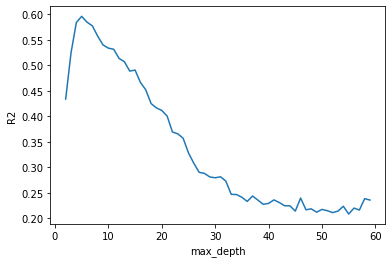

In [38]:
#visualize max_depth
import matplotlib.pyplot as plt
plt.plot(depths,scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [39]:
sorted_scores = scores.sort_values(by = 'Test Score', ascending = False)
sorted_scores.head()

,Test Score,Train Score
5,0.596056,0.604207
6,0.584616,0.615702
4,0.583937,0.582705
7,0.577384,0.629269
8,0.55714,0.641334


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\n MSE {mse},\n RMSE: {rmse},\n R^2: {r2} ')

In [42]:
#Evaluate train Model
eval_regression(y_train, train_pred)

MAE 736.1576217146434,
 MSE 972365.2274978656,
 RMSE: 986.0858114271118,
 R^2: 0.6714378167544087 


In [43]:
#Evaluate test model
eval_regression(y_test, test_pred)

MAE 558742259972.5935,
 MSE 4.5732477819291586e+25,
 RMSE: 6762579228318.999,
 R^2: -1.6575880497968222e+19 


#3) Make and Justify recommendation

I recommend using the regression tree because when you look at the R2 value of both models the R2 in the decision tree is negative and we should not get a negative on that value. 